# MNIST Digits Classification

In this example, I'll train the convolutional neural network in order to classify digits of MNIST data set. As MNIST has 10 class labels (0-9), it is multi-class problem.

In [193]:
#loading required libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import regularizers
from keras.utils import np_utils
from keras import backend as K
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.style.use('ggplot')
%matplotlib inline

In [115]:
print(K.backend())
print(K.image_data_format())

tensorflow
channels_last


In [116]:
np.random.seed(1)
#loading dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [117]:
print(x_train.shape)

(60000, 28, 28)


In [119]:
#reshaping inputs
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [120]:
#normalizing pixel values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [121]:
print(y_train.shape)

(60000,)


As of now, each example is labeled to the class it belongs; we need to hot-encode labels to make predictions on the final softmax fully-connected layer.

In [122]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)
print(y_test.shape)

(10000, 10)


In [229]:
#define cnn architecture
model = Sequential()

model.add(Conv2D(input_shape=(28, 28, 1), 
                 filters=32, 
                 kernel_size=(3,3), 
                 strides=(1,1), 
                 padding='valid', 
                 activation='relu'))

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [230]:
#compiling model
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer='adam')

In [231]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 84s 2ms/step - loss: 0.6406 - acc: 0.9169 - val_loss: 0.4361 - val_acc: 0.9620
Epoch 2/5
48000/48000 [==============================] - 92s 2ms/step - loss: 0.4497 - acc: 0.9470 - val_loss: 0.3533 - val_acc: 0.9658
Epoch 3/5
48000/48000 [==============================] - 100s 2ms/step - loss: 0.4115 - acc: 0.9525 - val_loss: 0.3517 - val_acc: 0.9728
Epoch 4/5
48000/48000 [==============================] - 88s 2ms/step - loss: 0.3893 - acc: 0.9552 - val_loss: 0.3169 - val_acc: 0.9714
Epoch 5/5
48000/48000 [==============================] - 90s 2ms/step - loss: 0.3748 - acc: 0.9562 - val_loss: 0.3120 - val_acc: 0.9742


In [232]:
print(history.history.keys())

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])


Text(0.5,1,'Training Loss and Validation Loss')

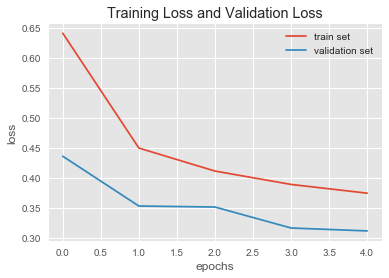

In [233]:
# Visualizing loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Training Loss and Validation Loss')

Text(0.5,1,'Training Accuracy and Validation Accuracy')

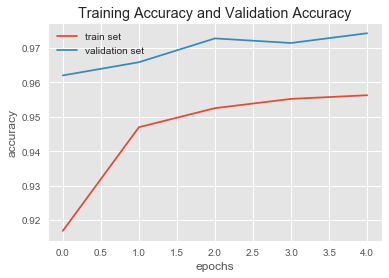

In [234]:
# Visualizing accuracy per epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Training Accuracy and Validation Accuracy')

In [235]:
#model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               589952    
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
__________

In [236]:
#visualizing model
plot_model(model, to_file='mnist_cnn.png', show_shapes=True, show_layer_names=True)

<img src="mnist_cnn.png">

In [237]:
#evaluating test set accuracy
_, accuracy = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 541us/step


In [238]:
print(accuracy)

0.976


In [239]:
#making prediction on test set
y_prob = model.predict(x_test) 
y_pred = y_prob.argmax(axis=-1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [240]:
#Analysing incorrectly predicted digits
y_actual = [j for i in y_test for j,k in enumerate(i) if k == 1]
print(confusion_matrix(y_actual, y_pred))

[[ 964    0    1    1    0    0   14    0    0    0]
 [   2 1094    7    0    0    0   29    0    3    0]
 [   3    0 1010    0    2    0    5    5    7    0]
 [   0    0    4  992    0    7    1    2    4    0]
 [   0    1    0    0  964    0    6    2    2    7]
 [   1    0    0    8    1  861   13    0    6    2]
 [   0    1    0    0    1    3  953    0    0    0]
 [   1    3   14    6    1    0    0  996    2    5]
 [   2    0    2    0    1    0    3    1  955   10]
 [   7    3    0    1    9    1    1    3   13  971]]


Seems like most incorrect predictions are for 6's for our above trained cnn architecture!!